# Web Scraping and Introductory Data Analysis

Welcome to Homework 0, where we will delve into web scraping and perform an introductory data analysis. This homework will be a hands-on exercise that will help you become familiar with the process of extracting data from websites and conducting basic statistical analysis. 

## Objectives

By the end of this homework, you will be able to:

1. Set up a Python environment with the necessary libraries for web scraping and data analysis.
2. Write a web scraping script using Beautiful Soup and Selenium to collect data from a website.
3. Sample from the collected dataset and compare the statistics of the sample and the population.
   
## Tasks

1. **Environment Setup**: Install the required libraries such as Beautiful Soup, Selenium, pandas, numpy, matplotlib, and seaborn.

2. **Web Scraping**: Write a script to scrape transaction data from [Etherscan.io](https://etherscan.io/txs). Use Selenium to interact with the website and Beautiful Soup to parse the HTML content.

3. **Data Sampling**: Once the data is collected, create a sample from the dataset. Compare the sample statistics (mean and standard deviation) with the population statistics.


## Deliverables

1. A Jupyter notebook with all the code and explanations.
2. A detailed report on the findings, including the comparison of sample and population statistics.
Note: You can include the report in your notebook.

## Getting Started

Begin by setting up your Python environment and installing the necessary libraries. Then, proceed with the web scraping task, ensuring that you handle any potential issues such as rate limiting. Once you have the data, move on to the data sampling and statistical analysis tasks. 

Remember to document your process and findings in the Jupyter notebook, and to include visualizations where appropriate to illustrate your results. <br>
Good luck, and happy scraping!

## Data Collection (Etherscan)

In this section, we will use web scraping to gather transaction data from the Ethereum blockchain using the Etherscan block explorer. Our objective is to collect transactions from the **last 10 blocks** on Ethereum.

To accomplish this task, we will employ web scraping techniques to extract the transaction data from the Etherscan website. The URL we will be targeting for our data collection is:

[https://etherscan.io/txs](https://etherscan.io/txs)

### Steps

1. **Navigate to the URL**: Use Selenium to open the Etherscan transactions page in a browser.

2. **Locate the Transaction Data**: Identify the HTML elements that contain the transaction data for the specified block range.

3. **Extract the Data**: Write a script to extract the transaction details e.g. Hash, Method, Block, etc.

4. **Handle Pagination**: If the transactions span multiple pages, implement pagination handling to navigate through the pages and collect all relevant transaction data.

5. **Store the Data**: Save the extracted transaction data into a structured format, such as a CSV file or a pandas DataFrame, for further analysis.

### Considerations

- **Rate Limiting**: Be mindful of the website's rate limits to avoid being blocked. Implement delays between requests if necessary.
- **Dynamic Content**: The Etherscan website may load content dynamically. Ensure that Selenium waits for the necessary elements to load before attempting to scrape the data.
- **Data Cleaning**: After extraction, clean the data to remove any inconsistencies or errors that may have occurred during the scraping process.

### Resources

- [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Selenium Documentation](https://selenium-python.readthedocs.io/)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Ethereum](https://ethereum.org/en/)

In [1]:
import json
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time


driver = webdriver.Firefox()
driver.get("https://etherscan.io/txs")
the_soup = BeautifulSoup(driver.page_source, 'html.parser')

The geckodriver version (0.33.0) detected in PATH at /usr/local/bin/geckodriver might not be compatible with the detected firefox version (123.0); currently, geckodriver 0.34.0 is recommended for firefox 123.*, so it is advised to delete the driver in PATH and retry


In [2]:
t = the_soup.find("tbody", attrs={"class":"align-middle text-nowrap"})

In [3]:
row = [i for i in t.children]
str(row[1].text)

'\n\n\n\n\n\n0x6cf9294cf674546aac36d8f6b0573e367cc86b658e6fd3ab94744b23f1cf9b1d\n\n\nSell To Uniswap\n19361725\n2024-03-04 12:13:475 secs ago1709554427\n\n\n0xC004979a...2E402202C\n \n\n\n\n\n\n\n0x: Exchange Proxy\n\n \n\n0 ETH\n0.0133372567.09219939\n'

In [4]:
for i in range(1, 10):
    print(i, row[i].findAll("td")[2].text)

1 Sell To Uniswap
2 Transfer
3 Transfer
4 Approve
5 Transfer
6 Transfer
7 Transfer
8 Transfer
9 Transfer


In [5]:
for i in range(len(row[1].findAll("td"))):
    print(i, repr(str(row[1].findAll("td")[i].text)))

0 '\n\n'
1 '\n\n0x6cf9294cf674546aac36d8f6b0573e367cc86b658e6fd3ab94744b23f1cf9b1d\n\n'
2 'Sell To Uniswap'
3 '19361725'
4 '2024-03-04 12:13:47'
5 '5 secs ago'
6 '1709554427'
7 '\n\n0xC004979a...2E402202C\n \n'
8 '\n\n'
9 '\n\n0x: Exchange Proxy\n\n \n'
10 '0 ETH'
11 '0.01333725'
12 '67.09219939'


In [6]:
def convert_row_to_dict(row):
    cells = row.findAll("td")
    return {"Txn Hash": cells[1].find("a").text,
            "Method": cells[2].find("span").text, # TODO cant show full text
            "Block": cells[3].find("a").text,
            "Time": cells[4].find("span").text,
            "From": cells[7].find("a")["data-bs-title"] if cells[7].find("a").has_attr('data-bs-title')\
            else cells[7].find("span")["data-bs-title"],
            "Self": cells[8].text == "SELF",
            "To": cells[9].find("a")["data-bs-title"] if cells[9].find("a").has_attr('data-bs-title')\
            else cells[9].find("span")["data-bs-title"],
            "Value": cells[10].text,
            "Txn Fee": cells[11].text,
            "GasPrice": cells[12].text,
            "Error": cells[1].findAll("span")[0]["data-bs-title"]\
            if len(cells[1].findAll("span")) > 1 else ""}
convert_row_to_dict(row[1])

{'Txn Hash': '0x6cf9294cf674546aac36d8f6b0573e367cc86b658e6fd3ab94744b23f1cf9b1d',
 'Method': 'Sell To Uniswap',
 'Block': '19361725',
 'Time': '2024-03-04 12:13:47',
 'From': '0xc004979aa12c8528ab478c003d623b22e402202c',
 'Self': False,
 'To': 'Public Tag: 0x: Exchange Proxy<br/>(0xdef1c0ded9bec7f1a1670819833240f027b25eff)',
 'Value': '0 ETH',
 'Txn Fee': '0.01333725',
 'GasPrice': '67.09219939',
 'Error': ''}

In [7]:
def parse_transaction(the_soup, log=False):
    table = the_soup.find("tbody", attrs={"class":"align-middle text-nowrap"})
    rows = [i for i in table.children]
    if log:
        print(f"--------\nsample row: {str(rows[1])[:300]}...\n----------\n")
    row_data = [convert_row_to_dict(rows[i]) for i in range(1, len(rows) - 1)]
    if log:
        print(f"--------\nsample data: {row_data[1]}\n----------\n")
    return row_data

page_data = parse_transaction(the_soup, True)

--------
sample row: <tr>
<td><button class="js-tnx-preview btn btn-sm btn-white fs-70x content-center mx-auto myFnExpandBox" data-bs-container="body" data-bs-content="&lt;i class='fas fa-circle-notch fa-spin text-primary fa-2x'&gt;&lt;/i&gt;" data-bs-content-id="js-tnx-preview" data-bs-custom-class="popover-preview" da...
----------

--------
sample data: {'Txn Hash': '0x2a9d7a0800910209a0e18cb48e806c0033a85f090ccf82223002eab2d405058c', 'Method': 'Transfer', 'Block': '19361725', 'Time': '2024-03-04 12:13:47', 'From': 'Public Tag: Crypto.com 2<br/>(0x46340b20830761efd32832a74d7169b29feb9758)', 'Self': False, 'To': 'Public Tag: Circle: USDC Token<br/>(0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48)', 'Value': '0 ETH', 'Txn Fee': '0.00328985', 'GasPrice': '72.86828978', 'Error': ''}
----------



In [15]:
def open_page():
    driver = webdriver.Firefox()
    driver.get("https://etherscan.io/txs")
    return driver

In [9]:
def find_first_block(driver) -> int:
    the_soup = BeautifulSoup(driver.page_source, 'html.parser')
    return int(parse_transaction(the_soup)[1]["Block"])
find_first_block(driver)

19361725

In [13]:
def read_blocks(driver, first_block) -> list[dict]:
    output = list()
    for i in range(BLOCK_COUNT):
        output.extend(collect_block_data(driver, first_block - i))
        print(f"sample block {first_block - i}: {output[-1]}\n")
        time.sleep(1)
    return output

In [8]:
def write_in_json_file(data_list):
    json_data = json.dumps(data_list, indent=4)

    file_path = f"data_block_{data_list[0]['Block']}_{data_list[-1]['Block']}.json"
    with open(file_path, "w") as file:
        file.write(json_data)

    print(f"Data has been saved to {file_path}")

In [10]:
def get_page_count(the_soup):
    return int(the_soup.find(class_="page-link text-nowrap").text.split()[3])
get_page_count(the_soup)

10000

In [11]:
def collect_block_data(driver, block):
    block_data = list()
    driver.get(f"https://etherscan.io/txs?block={block}")
    the_soup = BeautifulSoup(driver.page_source, 'html.parser')
    page_count = get_page_count(the_soup)
    for page_number in range(1, page_count + 1):
        driver.get(f"https://etherscan.io/txs?block={block}&p={page_number}")
        the_soup = BeautifulSoup(driver.page_source, 'html.parser')
        block_data.extend(parse_transaction(the_soup))
    return block_data

In [16]:
BLOCK_COUNT = 10
def scrape_data():
    driver = open_page()
    first_block = find_first_block(driver)
    data = read_blocks(driver, first_block)
    write_in_json_file(data)
# scrape_data()

The geckodriver version (0.33.0) detected in PATH at /usr/local/bin/geckodriver might not be compatible with the detected firefox version (123.0); currently, geckodriver 0.34.0 is recommended for firefox 123.*, so it is advised to delete the driver in PATH and retry


sample block 19361728: {'Txn Hash': '0xef3a5a1bf2cb209a15a53365193c80fcfeef3f19a5f03dea47f159f669360afa', 'Method': 'Execute', 'Block': '19361728', 'Time': '2024-03-04 12:14:23', 'From': '0x48bcbfd0fc8aee198937163f216ae72c7e05cd1e', 'Self': False, 'To': 'Public Tag: Uniswap: Universal Router<br/>(0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad)', 'Value': '0 ETH', 'Txn Fee': '0.00940175', 'GasPrice': '61.51409579', 'Error': ''}

sample block 19361727: {'Txn Hash': '0x3c377ac1f2299799bb2aa4ded596d3d42e8cf6fbaa80fbd7cc4c2ce183d4ed73', 'Method': 'Transfer', 'Block': '19361727', 'Time': '2024-03-04 12:14:11', 'From': '0xa5f5684dcd19711027c0588becabb30d3a213552', 'Self': False, 'To': '0x735c002d97003d032510292f1667530885824a6b', 'Value': '32 ETH', 'Txn Fee': '0.00269954', 'GasPrice': '128.54983736', 'Error': ''}

sample block 19361726: {'Txn Hash': '0xa1a260597144c9e973a59a1dca89042c1bddb11307c91e65f30a470f91e3ba5c', 'Method': '0x415565b0', 'Block': '19361726', 'Time': '2024-03-04 12:13:59', 'Fr

## Data Analysis

Now that we have collected the transaction data from Etherscan, the next step is to perform conduct an initial analysis. This task will involve the following steps:

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by converting data types, removing any irrelevant information, and handling **duplicate** values.

3. **Statistical Analysis**: Calculate the mean and standard deviation of the population. Evaluate these statistics to understand the distribution of transaction values. The analysis and plotting will be on **Txn Fee** and **Value**.

4. **Visualization**: This phase involves the creation of visual representations to aid in the analysis of transaction values. The visualizations include:
    - A histogram for each data column, which provides a visual representation of the data distribution. The selection of bin size is crucial and should be based on the data's characteristics to ensure accurate representation. Provide an explanation on the bin size selection!
    - A normal distribution plot fitted alongside the histogram to compare the empirical distribution of the data with the theoretical normal distribution.
    - A box plot and a violin plot to identify outliers and provide a comprehensive view of the data's distribution.

### Deliverables

The project aims to deliver the following deliverables:

- A refined pandas DataFrame containing the transaction data, which has undergone thorough cleaning and is ready for analysis.
- A simple statistical analysis evaluating the population statistics, offering insights into the distribution of transaction values and fees.
- A set of visualizations showcasing the distribution of transaction values for the population. These visualizations include histograms, normal distribution plots, box plots, and violin plots, each serving a specific purpose in the analysis.

### Getting Started

The project starts with the importing of transaction data into a pandas DataFrame, setting the stage for data manipulation and analysis. Subsequent steps involve the cleaning of the data to ensure its quality and reliability. Followed by the calculation of population statistics. Finally, a series of visualizations are created to visually analyze the distribution of transaction values and fees.

### 1. load the data

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
from scipy.stats import norm


df = pd.read_json("./data_block_19347625_19347616.json")
df["Time"] = pd.to_datetime(df["Time"])
df

,Txn Hash,Method,Block,Time,From,Self,To,Value,Txn Fee,GasPrice,Error
0,0x2c57b0a5d26e4a777e47c62ad2684d924215f38dea6f...,Transfer,19347625,2024-03-02 12:57:11,0x88c6c46ebf353a52bdbab708c23d0c81daa8134a,False,Public Tag: stakefish: Fee Recipient<br/>(0xff...,0.03527702 ETH,0.000993,47.233196,
1,0x388082202db7419cfff90deb1fcc01867d83988ee2ae...,Transfer,19347625,2024-03-02 12:57:11,0x4648451b5f87ff8f0f7d622bd40574bb97e25980,False,Public Tag: Tether: USDT Stablecoin<br/>(0xdac...,0 ETH,0.002178,47.233197,
2,0xcc23f903978f8c64bb06df0ebf86350e60c6f26ac822...,Transfer,19347625,2024-03-02 12:57:11,0x3672b6ed599c9376092c5a174eb0a0d672859b3d,False,Public Tag: Pepe: PEPE Token<br/>(0x6982508145...,0 ETH,0.002631,47.234196,
3,0x6fa7e98544eead95b49384de9393a048fef71b2b4b91...,0x415565b0,19347625,2024-03-02 12:57:11,0x3e03428bf447e5adc53089a3e2f36d5b60fd08f4,False,Public Tag: 0x: Exchange Proxy<br/>(0xdef1c0de...,0 ETH,0.011291,47.234196,
4,0x2a18618298d94d6d42d6a630535be542290c87087b09...,Transfer,19347625,2024-03-02 12:57:11,0xe49e1f7151ac6f46c23ae2d90f2d6fc1babde5ce,False,0x652441195c870f53366088671c845bd3325ad4e6,1.021732845 ETH,0.000992,47.234196,
...,...,...,...,...,...,...,...,...,...,...,...
1531,0x4510c5441a8a3470020ce2cf60859ebeeaa0952317f3...,0xa020e25d,19347616,2024-03-02 12:55:23,0xe75ed6f453c602bd696ce27af11565edc9b46b0d,False,0x00000000009e50a7ddb7a7b0e2ee6604fd120e49,0.000000003 ETH,0.004622,47.622935,
1532,0x47c821d9a4c016dcda59e69180e35b08db940cee66b2...,0x28a00911,19347616,2024-03-02 12:55:23,0x111206594f2fb5927f719b4417ab1da3d41b14b1,False,Public Tag: MEV Bot: 0x000...1d3<br/>(0x000000...,23 wei,0.028969,164.606820,
1533,0xf9536f708155998e5d521a4c3cd7822d6f252e77badf...,Execute,19347616,2024-03-02 12:55:23,0x86c4e7bac249275376bc4e500757c1d4196ca77a,False,Public Tag: Uniswap: Universal Router<br/>(0x3...,0 ETH,0.011128,47.623935,
1534,0x96b0faddcc84affecd9130d65934723d3d48acf4dd67...,Swap,19347616,2024-03-02 12:55:23,0x962bd36ff2b9bad3a93cf352cf64018e291ab0bd,False,Public Tag: Metamask: Swap Router<br/>(0x881d4...,0 ETH,0.011774,47.715144,


In [62]:
df['Value'] = df['Value'].apply(
    lambda val: float(val.split()[0]) *
     (1 if val.split()[1] == "ETH" else (10 ** -18 if val.split()[1] == "wei" else Exception("??"))))
df

,Txn Hash,Method,Block,Time,From,Self,To,Value,Txn Fee,GasPrice,Error
0,0x2c57b0a5d26e4a777e47c62ad2684d924215f38dea6f...,Transfer,19347625,2024-03-02 12:57:11,0x88c6c46ebf353a52bdbab708c23d0c81daa8134a,False,Public Tag: stakefish: Fee Recipient<br/>(0xff...,3.527702e-02,0.000993,47.233196,
1,0x388082202db7419cfff90deb1fcc01867d83988ee2ae...,Transfer,19347625,2024-03-02 12:57:11,0x4648451b5f87ff8f0f7d622bd40574bb97e25980,False,Public Tag: Tether: USDT Stablecoin<br/>(0xdac...,0.000000e+00,0.002178,47.233197,
2,0xcc23f903978f8c64bb06df0ebf86350e60c6f26ac822...,Transfer,19347625,2024-03-02 12:57:11,0x3672b6ed599c9376092c5a174eb0a0d672859b3d,False,Public Tag: Pepe: PEPE Token<br/>(0x6982508145...,0.000000e+00,0.002631,47.234196,
3,0x6fa7e98544eead95b49384de9393a048fef71b2b4b91...,0x415565b0,19347625,2024-03-02 12:57:11,0x3e03428bf447e5adc53089a3e2f36d5b60fd08f4,False,Public Tag: 0x: Exchange Proxy<br/>(0xdef1c0de...,0.000000e+00,0.011291,47.234196,
4,0x2a18618298d94d6d42d6a630535be542290c87087b09...,Transfer,19347625,2024-03-02 12:57:11,0xe49e1f7151ac6f46c23ae2d90f2d6fc1babde5ce,False,0x652441195c870f53366088671c845bd3325ad4e6,1.021733e+00,0.000992,47.234196,
...,...,...,...,...,...,...,...,...,...,...,...
1531,0x4510c5441a8a3470020ce2cf60859ebeeaa0952317f3...,0xa020e25d,19347616,2024-03-02 12:55:23,0xe75ed6f453c602bd696ce27af11565edc9b46b0d,False,0x00000000009e50a7ddb7a7b0e2ee6604fd120e49,3.000000e-09,0.004622,47.622935,
1532,0x47c821d9a4c016dcda59e69180e35b08db940cee66b2...,0x28a00911,19347616,2024-03-02 12:55:23,0x111206594f2fb5927f719b4417ab1da3d41b14b1,False,Public Tag: MEV Bot: 0x000...1d3<br/>(0x000000...,2.300000e-17,0.028969,164.606820,
1533,0xf9536f708155998e5d521a4c3cd7822d6f252e77badf...,Execute,19347616,2024-03-02 12:55:23,0x86c4e7bac249275376bc4e500757c1d4196ca77a,False,Public Tag: Uniswap: Universal Router<br/>(0x3...,0.000000e+00,0.011128,47.623935,
1534,0x96b0faddcc84affecd9130d65934723d3d48acf4dd67...,Swap,19347616,2024-03-02 12:55:23,0x962bd36ff2b9bad3a93cf352cf64018e291ab0bd,False,Public Tag: Metamask: Swap Router<br/>(0x881d4...,0.000000e+00,0.011774,47.715144,


#### Track 500 eth traction

In [152]:
df[df["Value"] > 300]

,Txn Hash,Method,Block,Time,From,Self,To,Value,Txn Fee,GasPrice,Error
677,0x0c8141f52e2009804a25e7a23ad68993af0a07179c0a...,Transfer,19347621,2024-03-02 12:56:23,0x4196c40de33062ce03070f058922baa99b28157b,False,Public Tag: Lido: wstETH Token<br/>(0x7f39c581...,500.0,0.006144,50.747998,


In [66]:
df[(df["From"] == "0x4196c40de33062ce03070f058922baa99b28157b") |  (df["To"] == "0x4196c40de33062ce03070f058922baa99b28157b")]

,Txn Hash,Method,Block,Time,From,Self,To,Value,Txn Fee,GasPrice,Error
677,0x0c8141f52e2009804a25e7a23ad68993af0a07179c0a...,Transfer,19347621,2024-03-02 12:56:23,0x4196c40de33062ce03070f058922baa99b28157b,False,Public Tag: Lido: wstETH Token<br/>(0x7f39c581...,500.0,0.006144,50.747998,
1300,0x845a2fdd441097b91044aea49f8261bdf5a48ddadea6...,Withdraw ETH,19347617,2024-03-02 12:55:35,0x4196c40de33062ce03070f058922baa99b28157b,False,0x893411580e590d62ddbca8a703d61cc4a8c7b2b9,0.0,0.018911,47.079028,


In [67]:
df[(df["To"].str.contains("Lido")) | (df["From"].str.contains("Lido"))]

,Txn Hash,Method,Block,Time,From,Self,To,Value,Txn Fee,GasPrice,Error
445,0xdfaf3e1ae4e26ef195cdecce7f483b20f63735a9f07b...,Approve,19347623,2024-03-02 12:56:47,0x4dc921de85561bca35d33ca15c19f2e1e5043590,False,Public Tag: Lido: stETH Token<br/>(0xae7ab9652...,0.000000,0.002168,50.069108,
470,0xbe991696be31477650f01ca7197bd0a471a655b25478...,Transfer,19347623,2024-03-02 12:56:47,Public Tag: Binance 16<br/>(0xdfd5293d8e347dfe...,False,Public Tag: Lido: LDO Token<br/>(0x5a98fcbea51...,0.000000,0.006703,51.279108,
496,0xed1f0965a9b24cc3e30375062f9ffdc1abb7b2e19388...,Transfer,19347622,2024-03-02 12:56:35,Public Tag: Titan Builder<br/>(0x4838b106fce96...,False,Public Tag: Lido: Execution Layer Rewards Vaul...,0.056132,0.001101,49.809176,
677,0x0c8141f52e2009804a25e7a23ad68993af0a07179c0a...,Transfer,19347621,2024-03-02 12:56:23,0x4196c40de33062ce03070f058922baa99b28157b,False,Public Tag: Lido: wstETH Token<br/>(0x7f39c581...,500.000000,0.006144,50.747998,
705,0xb3dbe655b904df10da63534bf96a1641baf3a28925e9...,Approve,19347621,2024-03-02 12:56:23,0xaeddc5c90df91d8a9f1e9ec96aee93e64c8f045a,False,Public Tag: Lido: stETH Token<br/>(0xae7ab9652...,0.000000,0.003328,50.742275,
903,0x23589249d4e5beeac45f0ca096221abeb8e0d7d32c8b...,Approve,19347620,2024-03-02 12:56:11,0xe81032708386337d65678303678caf2597f315e9,False,Public Tag: Lido: stETH Token<br/>(0xae7ab9652...,0.000000,0.003102,47.302860,
956,0x05434d3467ade2997c5ce99715b64ef3e4cc9169a9db...,Transfer,19347619,2024-03-02 12:55:59,Public Tag: Faith Builder<br/>(0x5124fcc2b3f99...,False,Public Tag: Lido: Execution Layer Rewards Vaul...,0.014163,0.001068,48.291462,


#### static analyze

In [110]:
median = {i: np.median(df[i]) for i in ["Value", "Txn Fee", "GasPrice"]}
IQR = {i: np.subtract(*np.percentile(df[i], [75, 25])) for i in ["Value", "Txn Fee", "GasPrice"]}
df_static = pd.concat([df.describe(), pd.DataFrame([median, IQR], columns=median.keys(), index=["median", "IQR"])])[["Value", "Txn Fee", "GasPrice"]].style.set_caption("with zero")
df_static

,Value,Txn Fee,GasPrice
count,1536.000000,1536.000000,1536.000000
mean,0.670633,0.005073,50.953806
std,13.049007,0.009915,15.700495
min,0.000000,0.000980,46.678019
25%,0.000000,0.001082,47.301360
50%,0.000000,0.002366,48.678019
75%,0.045677,0.005992,50.301624
max,500.000000,0.121668,361.503483
median,0.000000,0.002366,48.678019
IQR,0.045677,0.004909,3.000264


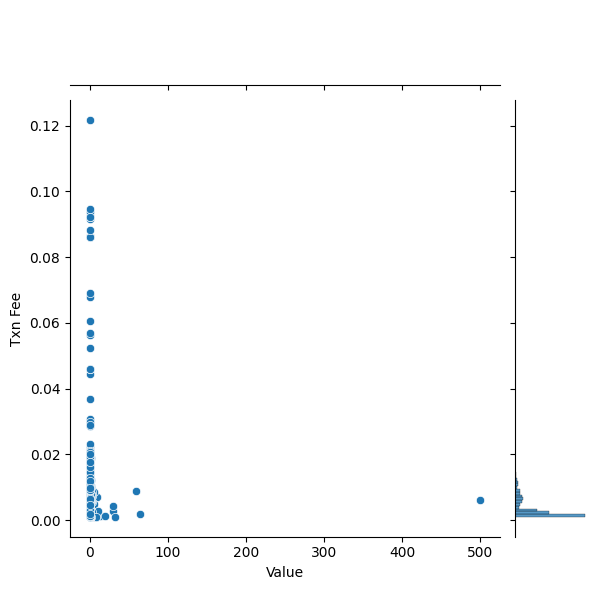

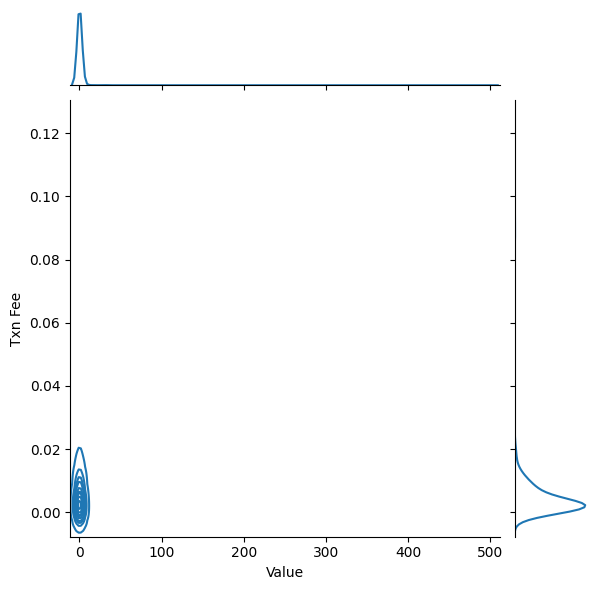

In [153]:
sns.jointplot(x="Value", y="Txn Fee", data=df, kind="scatter")
sns.jointplot(x="Value", y="Txn Fee", data=df, kind="kde")

<AxesSubplot: xlabel='GasPrice'>

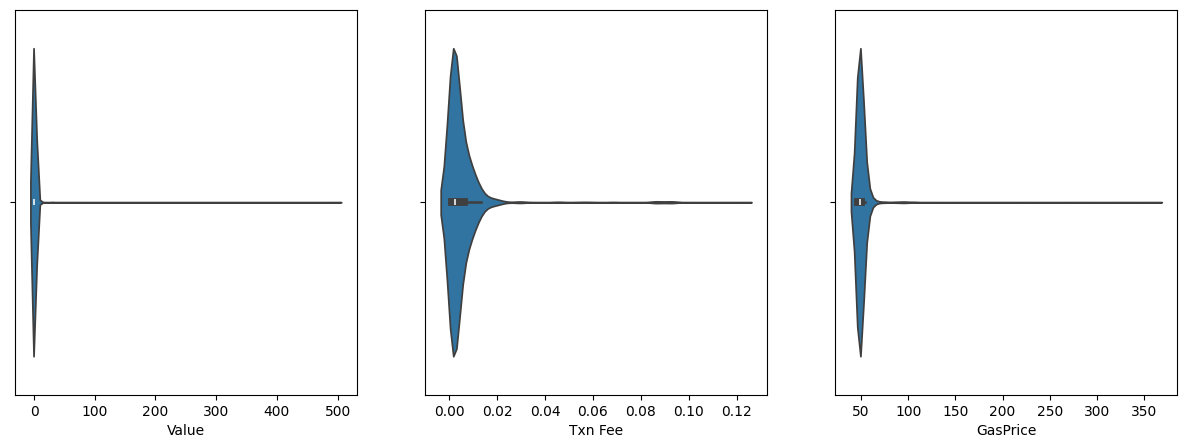

In [147]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.violinplot(x=df["Value"], ax=axes[0])
sns.violinplot(x=df["Txn Fee"], ax=axes[1])
sns.violinplot(x=df["GasPrice"], ax=axes[2])

In [161]:
data = []

for method in df.Method.unique():
    if len(df[df.Method == method]) > 30:
        data.append(go.Box(y=df[df.Method == method].Value, name=method))

fig = go.Figure(data=data, layout={"title": "Value box plot by method"})
iplot(fig, show_link=False)

### remove zero

In [22]:
df_without_zero = df.drop(df[df['Value'] == 0].index)

In [148]:
median = {i: np.median(df_without_zero[i]) for i in ["Value", "Txn Fee", "GasPrice"]}
IQR = {i: np.subtract(*np.percentile(df_without_zero[i], [75, 25])) for i in ["Value", "Txn Fee", "GasPrice"]}
df_without_zero_static = pd.concat([df_without_zero.describe(), pd.DataFrame([median, IQR], columns=median.keys(), index=["median", "IQR"])])[["Value", "Txn Fee", "GasPrice"]].style.set_caption("without zero")
df_without_zero_static

,Value,Txn Fee,GasPrice
count,706.000000,706.000000,706.000000
mean,1.459054,0.003097,51.516851
std,19.224778,0.004016,18.340651
min,0.000000,0.000980,46.678019
25%,0.013132,0.001014,47.434373
50%,0.057349,0.001066,49.033394
75%,0.295970,0.005286,50.724862
max,500.000000,0.052443,361.503483
median,0.057349,0.001066,49.033394
IQR,0.282838,0.004271,3.290489


#### get log value and txn fee

In [24]:
import math
df_log = df.copy(deep=True)
df_log['Value'] = df['Value'].apply(
    lambda val: math.log2(val) if val != 0 else math.log2(10 ** -25))
df_log['Txn Fee'] = df['Txn Fee'].apply(
    lambda val: math.log2(val))
df_log['GasPrice'] = df['GasPrice'].apply(
    lambda val: math.log2(val))

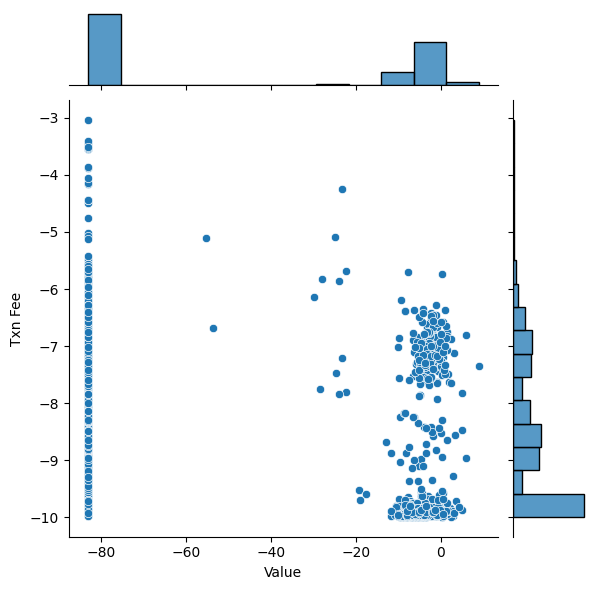

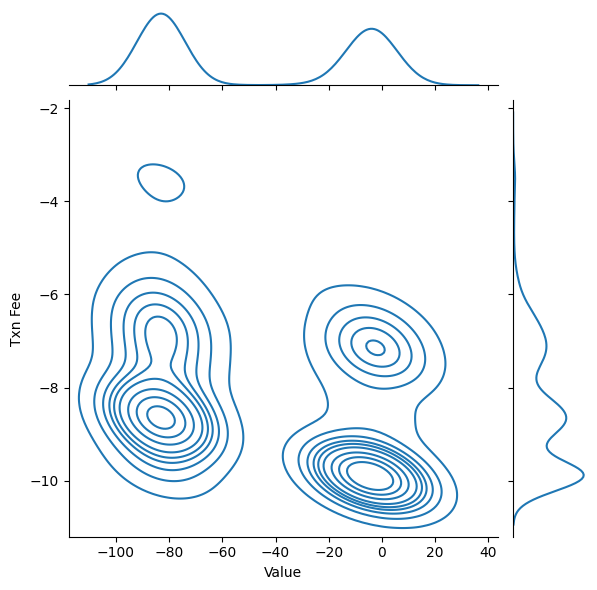

In [10]:
sns.jointplot(x="Value", y="Txn Fee", data=df_log, kind="scatter")
sns.jointplot(x="Value", y="Txn Fee", data=df_log, kind="kde")

<AxesSubplot: xlabel='GasPrice'>

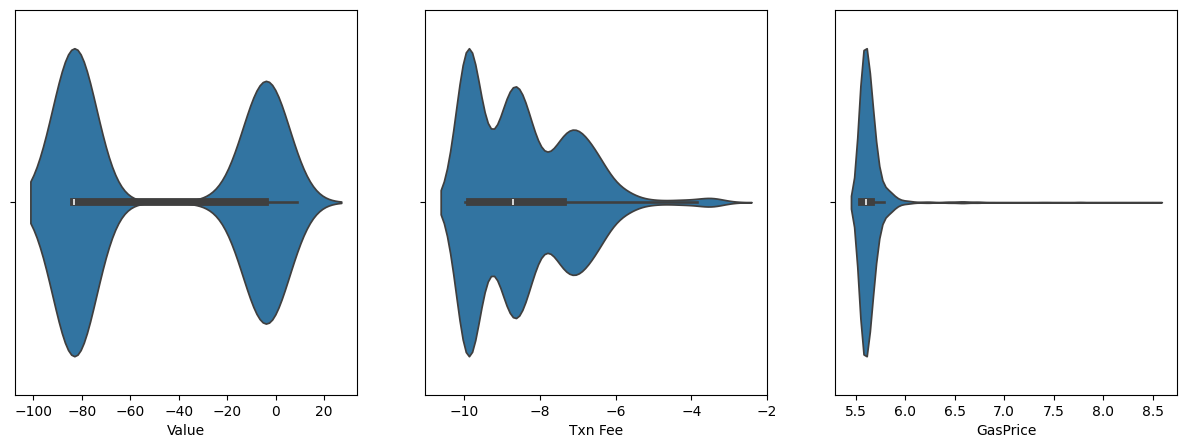

In [115]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.violinplot(x=df_log["Value"], ax=axes[0])
sns.violinplot(x=df_log["Txn Fee"], ax=axes[1])
sns.violinplot(x=df_log["GasPrice"], ax=axes[2])

In [162]:
data = []

for method in df_log.Method.unique():
    if len(df_log[df_log.Method == method]) > 30:
        data.append(go.Box(y=df_log[df_log.Method == method].Value, name=method))

fig = go.Figure(data=data, layout={"title": "Value box plot by method"})
iplot(fig, show_link=False)

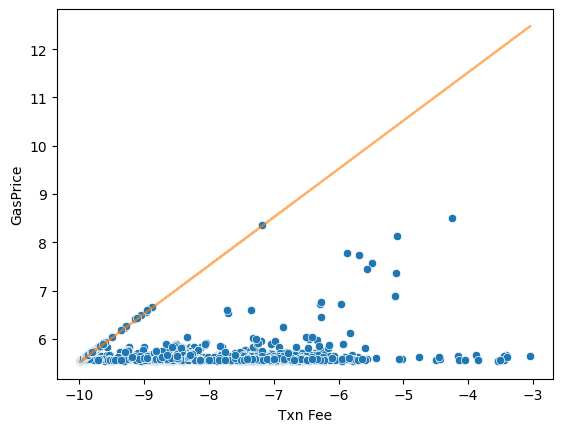

In [145]:
sns.scatterplot(df_log, x="Txn Fee", y="GasPrice")
plt.plot(df_log["Txn Fee"], df_log["Txn Fee"] + 15.52, color="C1", alpha=0.6)

#### remove zero from value (log)

In [23]:
df_without_zero_log = df_log.drop(df_log[df_log['Value'] < -70].index)

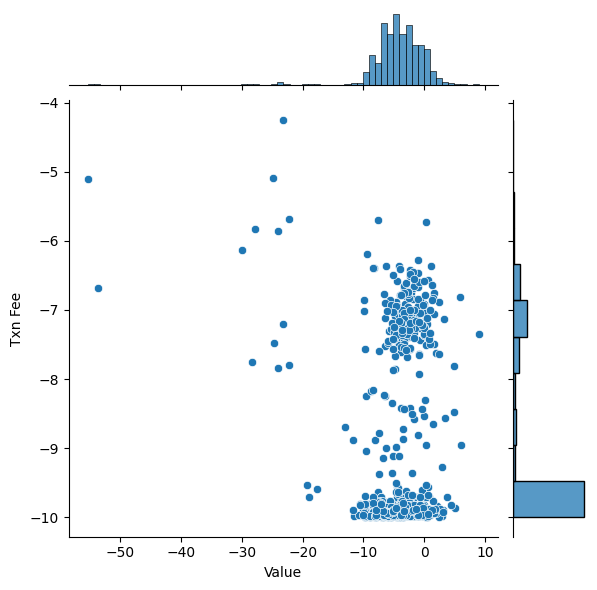

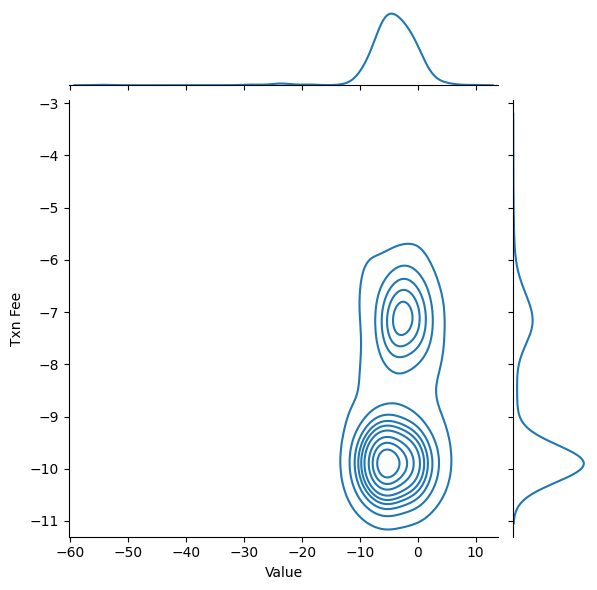

In [14]:
sns.jointplot(x="Value", y="Txn Fee", data=df_without_zero_log, kind="scatter")
sns.jointplot(x="Value", y="Txn Fee", data=df_without_zero_log, kind="kde")

<AxesSubplot: xlabel='GasPrice'>

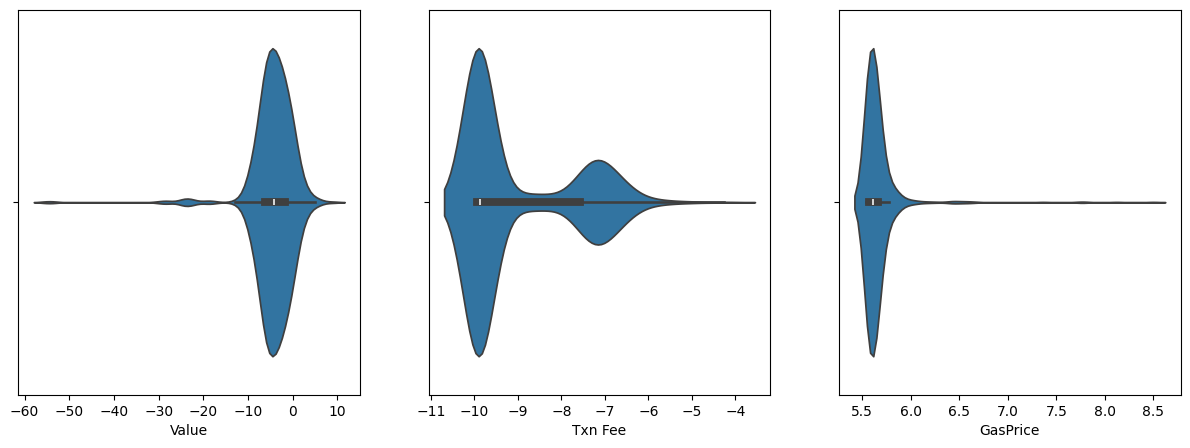

In [116]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.violinplot(x=df_without_zero_log["Value"], ax=axes[0])
sns.violinplot(x=df_without_zero_log["Txn Fee"], ax=axes[1])
sns.violinplot(x=df_without_zero_log["GasPrice"], ax=axes[2])

In [163]:
data = []

for method in df_without_zero_log.Method.unique():
    if len(df_without_zero_log[df_without_zero_log.Method == method]) > 10:
        data.append(go.Box(y=df_without_zero_log[df_without_zero_log.Method == method].Value, name=method))

fig = go.Figure(data=data, layout={"title": "Value box plot by method"})
iplot(fig, show_link=False)

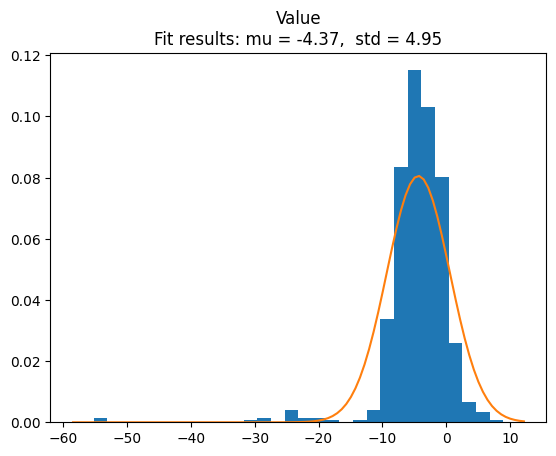

In [164]:
data = df_without_zero_log["Value"]

mu, std = norm.fit(data)

plt.hist(data, bins=30, density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p)
title = f"Value\nFit results: mu = {mu:.2f},  std = {std:.2f}"
plt.title(title)

plt.show()

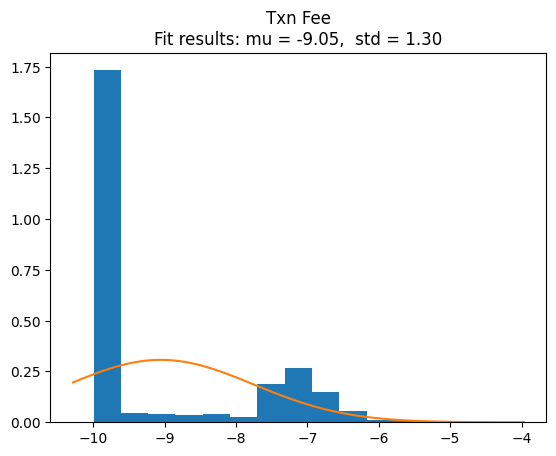

In [165]:
data = df_without_zero_log["Txn Fee"]

mu, std = norm.fit(data)

plt.hist(data, bins=15, density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p)
title = f"Txn Fee\nFit results: mu = {mu:.2f},  std = {std:.2f}"
plt.title(title)

plt.show()

## Data Sampling and Analysis

In this section, we will delve into the process of data sampling and perform an initial analysis on the transaction data we have collected. Our objective is to understand the distribution of transaction values by sampling the data and comparing the sample statistics with the population statistics.

### Steps

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by handling missing values, converting data types, and removing any irrelevant information.

3. **Simple Random Sampling (SRS)**: Create a sample from the dataset using a simple random sampling method. This involves randomly selecting a subset of the data without regard to any specific characteristics of the data.

4. **Stratified Sampling**: Create another sample from the dataset using a stratified sampling method. This involves dividing the data into strata based on a specific characteristic (e.g., transaction value) and then randomly selecting samples from each stratum. Explain what you have stratified the data by and why you chose this column.

5. **Statistical Analysis**: Calculate the mean and standard deviation of the samples and the population. Compare these statistics to understand the distribution of transaction values.

6. **Visualization**: Plot the distribution of transaction values and fees for both the samples and the population to visually compare their distributions.

### Considerations

- **Sample Size**: The size of the sample should be large enough to represent the population accurately but not so large that it becomes impractical to analyze.
- **Sampling Method**: Choose the appropriate sampling method based on the characteristics of the data and the research question.

Explain the above considerations in your report.

In [20]:
# Your code here